# 📬 Olá, neste projeto iremos desbravar a **Estatística descritiva** e analisar um DataFrame retirado de um gmail e responder algumas perguntas, venha comigo nesta jornada.

### Importando as bibliotecas necessárias para o projeto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### 🗄 Primeiro lendo os arquivos de email:

In [2]:
email = pd.read_csv("https://raw.githubusercontent.com/vinimedeiros13/Statistic/main/Projeto/Projeto%202/emails_processadoss.csv")

#### Removendo o índice 0 que está atrapalhando as colunas:

In [3]:
email.drop('Unnamed: 0', axis='columns', inplace=True)

#### Exibindo uma pequena parte do DataFrame:

In [4]:
email.head()

,subject,from,date,to,label,thread,dayofweek,timeofday,year,month
0,=?UTF-8?q?Voc=C3=AA_tem_que_ter_estes_itens_em...,offers@wish.com,2021-02-26,"""=?utf-8?q?Vin=C3=ADcius_Medeiros?="" <viniapnm...",inbox,1692770206194795587,Friday,11.963333,2021,February
1,=?UTF-8?Q?=E3=80=90E-Pal=E3=80=91?=,official@epal.gg,2021-03-06,viniapnm@gmail.com,inbox,1693525113471893522,Saturday,19.945556,2021,March
2,DSCO is now available!,vsco@official.vsco.co,2021-02-28,viniapnm@gmail.com,inbox,1692992869753561945,Sunday,21.389167,2021,February
3,=?UTF-8?q?=E2=9A=A1=F0=9F=94=8C_Todo_o_materia...,offers@wish.com,2021-04-24,"""=?utf-8?q?Vin=C3=ADcius_Medeiros?="" <viniapnm...",inbox,1697932412812193275,Saturday,11.481111,2021,April
4,=?UTF-8?q?=F0=9F=8E=89_Confira_o_que_acabou_de...,offers@wish.com,2021-02-04,"""=?utf-8?q?Vin=C3=ADcius_Medeiros?="" <viniapnm...",inbox,1690770887097317107,Thursday,10.324722,2021,February


## 📬 Temos emails de **2015** até **2021**, emails promocionais especificamente.

## **1) Quantos emails foram mandados por semana, por mês e por ano, considerando a janela de tempo dos dados baixados?**

#### Criando 3 variáveis:
* anos -> Irá armazenar os dados(emails) filtrando por anos
* mes -> Irá armazenar os dados(emails) filtrando por mês
* dia -> Irá armazenar os dados(emails) filtrando a cada 7 dias da primeira a última semana registrado

In [5]:
anos = email["year"].value_counts()

In [6]:
mes = email["month"].value_counts()

In [7]:
email['date'] = pd.to_datetime(email['date'])
dia = email.resample('W', on='date')['dayofweek'].count()

### Exibindo os emails por ano:

In [8]:
anos

2019    560
2020    377
2021    152
2016     23
2017     21
2018     19
2015      7
Name: year, dtype: int64

### 📨 Logo de cara percebemos que 2019 foi o ano com mais emails

### Exibindo os emails recebidos por mês:

In [9]:
mes

March        165
April        145
July         124
August       118
May          108
June         102
February      83
January       81
November      77
December      60
September     49
October       47
Name: month, dtype: int64

### 📨 Março e abril foram os meses onde mais houveram emails

In [10]:
dia

date
2015-05-03     1
2015-05-10     1
2015-05-17     1
2015-05-24     0
2015-05-31     0
              ..
2021-03-28     7
2021-04-04     8
2021-04-11    10
2021-04-18    10
2021-04-25     7
Freq: W-SUN, Name: dayofweek, Length: 313, dtype: int64

### 📨 Terça e quarta foram os dias da semana onde mais houveram emails

#### Criando listas com strings que usaremos nos gráficos e nos DataFrames

In [11]:
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Set', 'Ago', 'Out', 'Nov', 'Dez']

In [12]:
total_anos = ("2015", "2016", "2017", "2018", "2019", "2020", "2021")

In [13]:
semanas = ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"]

## 🗃 **Emails por ano**

#### Criando variáveis de cada ano para utilizar na criação de gráficos

In [14]:
ano_2015 = anos[2015]
ano_2016 =  anos[2016]
ano_2017 =  anos[2017]
ano_2018 =  anos[2018]
ano_2019 =  anos[2019]
ano_2020 =  anos[2020]
ano_2021 =  anos[2021]

#### Criando um DataFrame para armazenar a quantidade de emails por anos

In [15]:
_anos = (ano_2015, ano_2016, ano_2017, ano_2018, ano_2019, ano_2020, ano_2021)
aanos = pd.DataFrame(_anos, total_anos)
aanos[0] = aanos[0].round(3)
aanos

,0
2015,7
2016,23
2017,21
2018,19
2019,560
2020,377
2021,152


### 📊 Plotando o gráfico para facilitar a visibilidade dos dados:

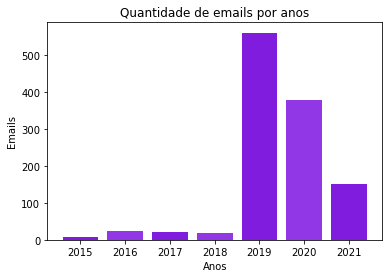

In [16]:
plt.bar(total_anos, _anos, color=["#801cdd", "#9237e6"])
plt.ylabel("Emails")
plt.xlabel("Anos")
plt.title("Quantidade de emails por anos")
plt.show()

### 📉 Então temos 2019 líder de emails, em seguida 2020 e 2021.

## 🗃 **Emails por mês**

#### Criando variáveis para armazenar os dados dos meses e usar posteriormente para plotar gráficos

In [17]:
Janeiro = mes["January"]
Fevereiro = mes["February"]
Março = mes["March"]
Abril = mes["April"]
Maio = mes["May"]
Junho = mes["June"]
Julho = mes["July"]
Agosto = mes["August"]
Setembro = mes["September"]
Outubro = mes["October"]
Novembro = mes["November"]
Dezembro = mes["December"]

#### Criando um DataFrame para armazenar a quantidade de emails por meses

In [18]:
_meses = (Janeiro, Fevereiro, Março, Abril, Maio, Junho, Julho, Agosto, Setembro, Outubro, Novembro, Dezembro)
_Meses = pd.DataFrame(_meses, meses)
_Meses[0] = _Meses[0].round(3)
_Meses

,0
Jan,81
Fev,83
Mar,165
Abr,145
Mai,108
Jun,102
Jul,124
Set,118
Ago,49
Out,47


### 📊 Plotando o gráfico para facilitar a visibilidade dos dados:

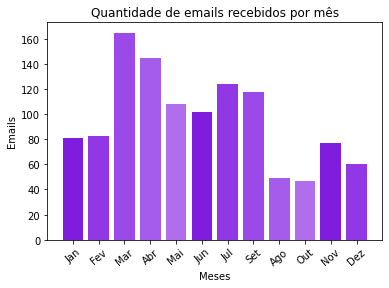

In [19]:
plt.bar(meses, _meses, color=["#801cdd", "#9237e6", "#9c49e9", "#a65ceb", "#b06eed"])
plt.ylabel("Emails")
plt.xticks(rotation=40)
plt.xlabel("Meses")
plt.title("Quantidade de emails recebidos por mês")
plt.show()

### Março foi o mês onde mais houve mensagens, outubro teve a menor quantidade.

### Podemos justificar março com mais emails levando em consideração que março tem alguns feriados como dia da mulher, podendo vir ofertas de produtos femininos. E março é o mês pós virada de ano e carnaval, ou seja, há uma movimentação comercial maior após essas datas.

## 🗃 **Emails por dias da semana**

### Para agrupar emails por semana (a cada 7 dias):

In [20]:
email['date'] = pd.to_datetime(email['date'])
dia = email.resample('W', on='date')['dayofweek'].count()
dia.to_frame()

,dayofweek
date,
2015-05-03,1
2015-05-10,1
2015-05-17,1
2015-05-24,0
2015-05-31,0
...,...
2021-03-28,7
2021-04-04,8
2021-04-11,10


### 📊 Plotando o gráfico para facilitar a visibilidade dos dados:

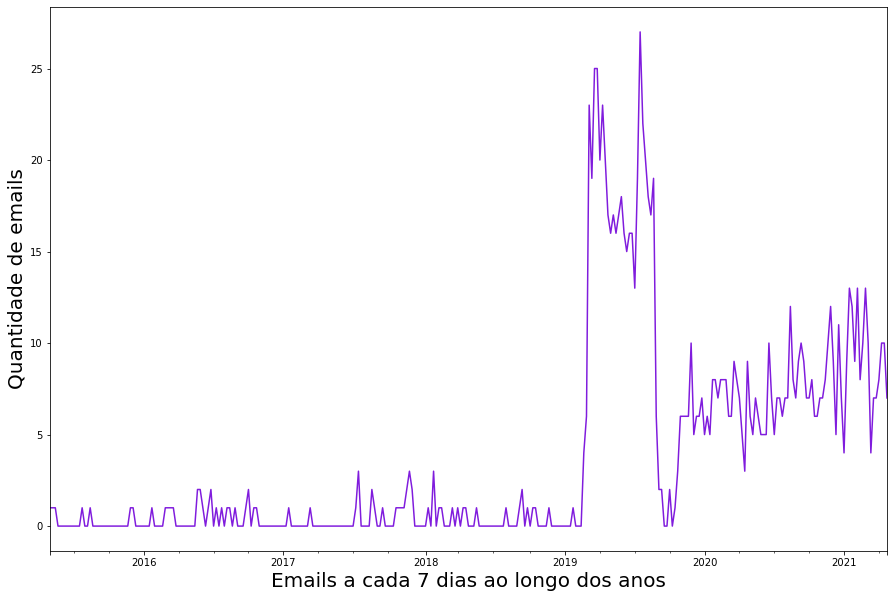

In [21]:
plt.figure(figsize=(15,10))
dia.plot(color=["#801cdd"])
plt.xlabel("Emails a cada 7 dias ao longo dos anos", size=20)
plt.ylabel("Quantidade de emails", size=20)
plt.show()

### Há um pico de emails por semana a parti de 2019, o que faz sentido olhando o gráfico de anos. 2019 chega a ter +25 emails por semanam Esses valores começam a cair em 2020, passando a ter no máximo 15 emails por semana.

## **2) Há uma variação significativa na quantidade de emails enviados por cada período considerado na questão anterior?**

### 📝 Tirando o desvio padrão dos emails recebidos por anos:

In [86]:
anosdesvio = anos.std(ddof=0)
anosdesvio

202.94816871229332

In [87]:
anosmedia = anos.mean()

### 📝 Agora calculando a variância:

In [88]:
anos_var = anosdesvio*anosmedia/100
anos_var

336.0241821964971

### 📝 Tirando o desvio padrão dos emails recebidos por mês:

In [89]:
mesdesvio = mes.std(ddof=0)
mesdesvio

35.66851630717986

In [90]:
mesmedia = mes.mean()

### 📝 Agora calculando a variância:

In [91]:
mes_var = mesdesvio*mesmedia/100
mes_var

34.449842000017874

### 📝 Tirando o desvio padrão dos emails recebidos por dia:

In [92]:
diadesvio = dia.std(ddof=0)
diadesvio

5.656110781815365

In [93]:
diamedia = dia.mean()

### 📝 Agora calculando a variância:

In [30]:
dia_var = diadesvio*diamedia/100
dia_var

0.20943873470044752

## **3) Existe algum período, dos considerados nas duas questões anteriores, em que o número de emails enviados possa ser considerado um outlier? Você enxerga alguma justificativa para esse período ter esse outlier, caso haja?**

## 📆 Começando pelos **Meses**

#### DataFrame dos meses criado anteriormente, agora utilizado para plotar um gráfico boxplot.

In [31]:
_Meses

,0
Jan,81
Fev,83
Mar,165
Abr,145
Mai,108
Jun,102
Jul,124
Set,118
Ago,49
Out,47


#### Usando a função describe para ver média, mediana, valor máximo, etc.

In [32]:
_Meses.describe()

,0
count,12.000000
mean,96.583333
std,37.254550
min,47.000000
25%,72.750000
50%,92.500000
75%,119.500000
max,165.000000


### Média = 96
### Mediana = 92
### Desvio padrão = 37
### Valor mínimo = 47
### Valor máximo = 165

### Há um cálculo para verificar a presenção de Outliers:
`Q + 1.5*IQR` <br>
Q = Valor máximo ou mínimo <br>
IQR = Valores do percentil 75% - 25%

### 📈 Plotando o boxplot e verificar a existência de um outlier:

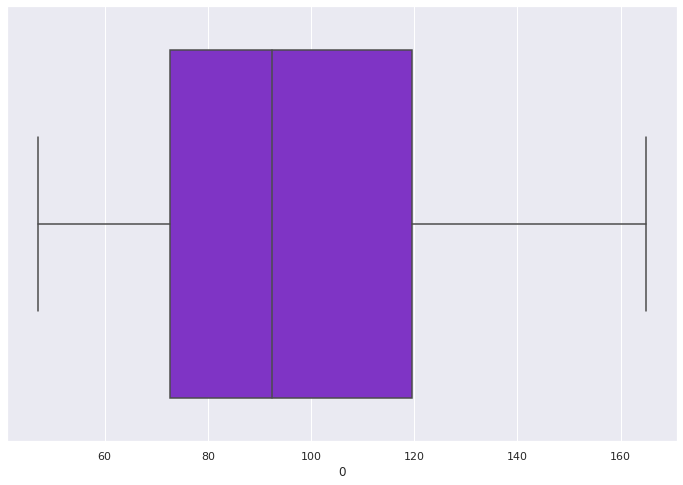

In [33]:
sns.set(rc={'figure.figsize':(12,8)})
Box_mes = sns.boxplot(x=_Meses[0], color="#801cdd")

### Não há presença de Outliers, isso significa que não temos valores altos ou baixos demais, podemos ver isso pelo cálculo visto anteriormente.

`119 + (1.5*(119-72)) = 189.5`

### Ou seja, o valor resultante está dentro do intervalo de valores máximos ou mínimos do boxplot

## 📆 Agora em **Anos**

#### DataFrame dos anos criado anteriormente, agora utilizado para plotar um gráfico boxplot.

In [34]:
aanos

,0
2015,7
2016,23
2017,21
2018,19
2019,560
2020,377
2021,152


#### Usando a função describe para ver média, mediana, valor máximo, etc.

In [35]:
aanos.describe()

,0
count,7.000000
mean,165.571429
std,219.209076
min,7.000000
25%,20.000000
50%,23.000000
75%,264.500000
max,560.000000


### Média = 165
### Mediana = 23
### Desvio padrão = 219
### Valor mínimo = 7
### Valor máximo = 560

### 📈 Plotando o boxplot e verificar a existência de um outlier

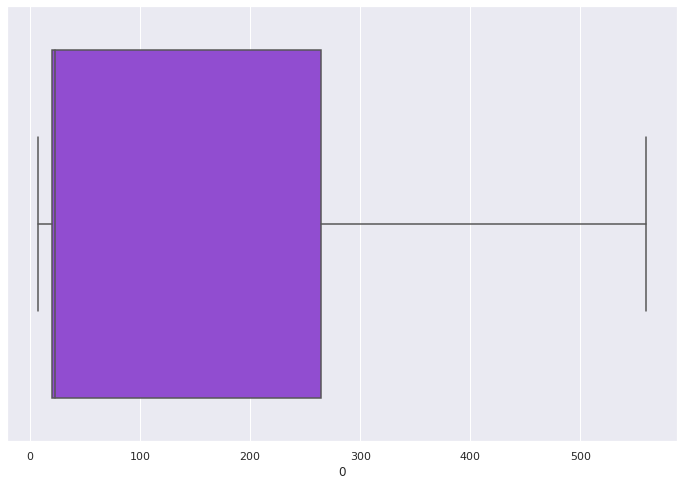

In [36]:
sns.set(rc={'figure.figsize':(12,8)})
Box_ano = sns.boxplot(x=aanos[0], color="#9237e6")

### Também não há presença de Outliers, verificando pelo cálculo:

`264 + (1.5*(264-20) = 630` <br>
### Não há valores que ultrapassem o valor máximo de 630, logo não há presença de Outliers

## 📆 Finalizando com os **dias da semana**

In [37]:
dia

date
2015-05-03     1
2015-05-10     1
2015-05-17     1
2015-05-24     0
2015-05-31     0
              ..
2021-03-28     7
2021-04-04     8
2021-04-11    10
2021-04-18    10
2021-04-25     7
Freq: W-SUN, Name: dayofweek, Length: 313, dtype: int64

#### Usando um sort_values para ver as ocorrências dos valores, ascending = False para organizar do maior para o menor

In [38]:
dia.sort_values(ascending=False).head(5)

date
2019-07-21    27
2019-03-31    25
2019-03-24    25
2019-03-10    23
2019-04-14    23
Name: dayofweek, dtype: int64

#### Usando a função describe para ver média, mediana, valor máximo, etc.

In [39]:
dia.describe()

count    313.000000
mean       3.702875
std        5.665168
min        0.000000
25%        0.000000
50%        1.000000
75%        6.000000
max       27.000000
Name: dayofweek, dtype: float64

### Média = 3
### Mediana = 1
### Desvio padrão = 5
### Valor mínimo = 0
### Valor máximo = 27

### 📈 Plotando o boxplot e verificar a existência de um outlier

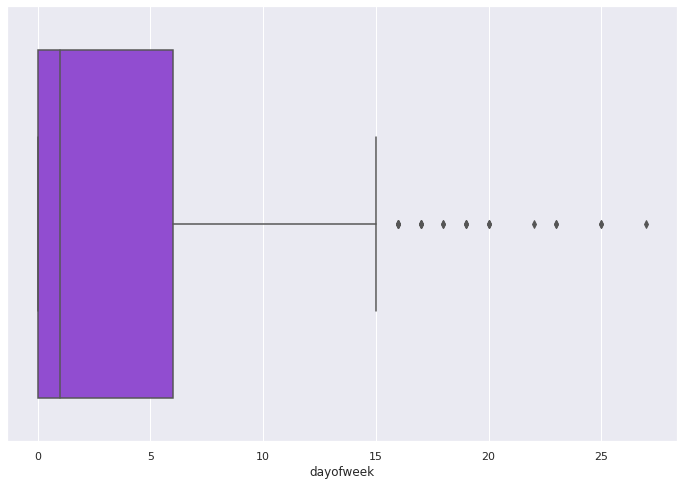

In [40]:
sns.set(rc={'figure.figsize':(12,8)})
Box_semanas = sns.boxplot(x=dia, color="#9237e6")

### Agora há presença de Outliers, vamos entender o por que
#### Fazendo os cálculos:

`6 + (1.5*(6)) = 15`

### Há muitos valores que ultrapassam 15, vejamos alguns:

In [41]:
dia.sort_values(ascending=False).head(10)

date
2019-07-21    27
2019-03-31    25
2019-03-24    25
2019-03-10    23
2019-04-14    23
2019-07-28    22
2019-04-07    20
2019-04-21    20
2019-08-04    20
2019-08-25    19
Name: dayofweek, dtype: int64

### Ou seja, várias semanas receberam mais de 15 emails, que é um valor acima do valor máximo.

## **4) Qual é o número médio de e-mails por hora? Essa média varia ao longo da semana?**

## Retirando uma amostra dos dados completos e escolhendo os meses de abril e novembro de 2020 para fazer as comparações:

### Média de emails por semana no mes de **abril de 2020**

In [42]:
abril= email[email.month=="April"]
Abril2020 = abril[abril.year==2020]
abril2020 = pd.DataFrame(Abril2020[["year","date","dayofweek"]])

In [43]:
médiaabril = 25/720
médiaabril

0.034722222222222224

### 🗃 No mês de abril de 2020 houve uma média de 0.03 de emails recebidos por hora.

### Média de emails por semana no mes de **novembro de 2020**

In [44]:
November = email[email.month=="November"]
November2020 = November[November.year==2020]
november2020 = pd.DataFrame(November2020[["year","date","dayofweek"]])

In [45]:
médianovembro = 39/720
médianovembro

0.05416666666666667

In [46]:
x = ['Abril', "Novembro"]
y = [médiaabril, médianovembro]

### 🗃 Em novembro a média subiu para 0.05 emails por hora.

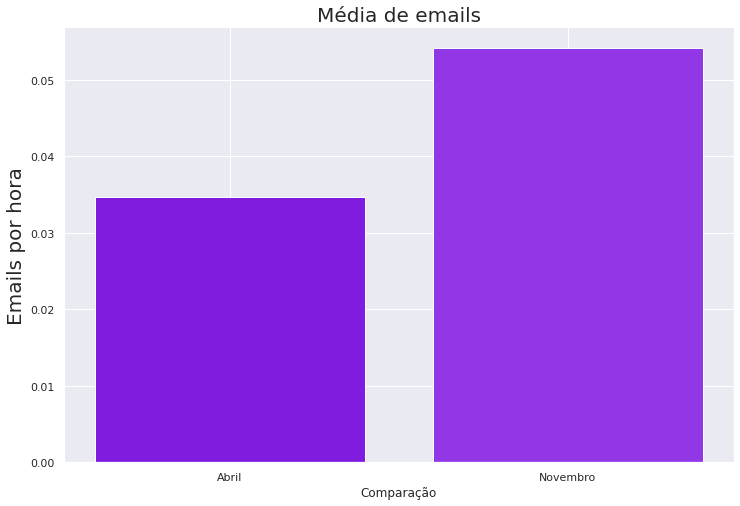

In [47]:
plt.bar(x, y, color=["#801cdd", "#9237e6"])
plt.ylabel("Emails por hora", size=20)
plt.xlabel("Comparação")
plt.title("Média de emails", size=20)
plt.show()

### Se justifica Novembro ter recebido mais emails promocionais por ser final de ano, época de mais vendas de produtos. Então a média de emails em novembro foi superior a de abril.

## **5) Com quem me comunico com mais frequência, por meio de emails? Considere tanto por envio, quanto por recepção de emails**

#### Criando uma lista com os principais remetentes dos e-mails

In [48]:
rec = ["Wish", "Depositphotos", "Motorola", "Googleplay", "iFood", "Canva"]

#### Exibindo os remetentes que mais enviaram e-mails

In [49]:
From = pd.DataFrame(email['from'])
From = From.value_counts().head(6)
From

from                      
offers@wish.com               907
mail@depositphotos.com         75
info@motorola-mail.com         39
news-googleplay@google.com     25
news@news.ifood.com.br         16
start@engage.canva.com         15
dtype: int64

### 📊 Mostrando os dados da tabela graficamente:

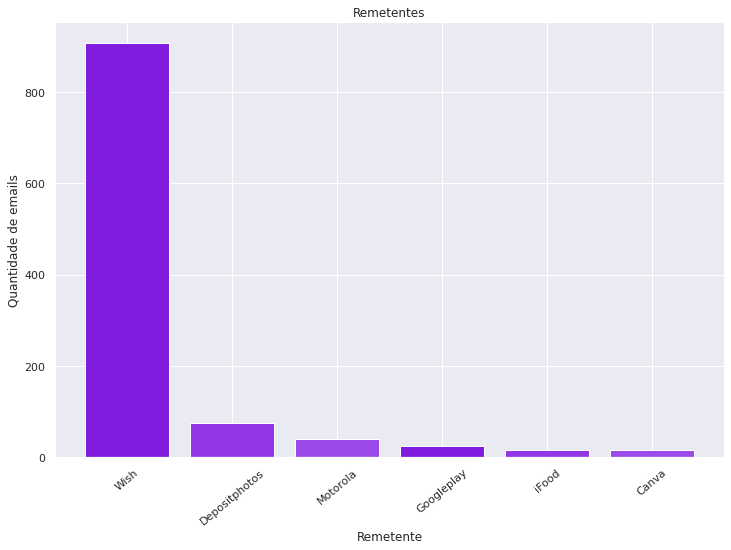

In [50]:
plt.bar(rec, From, color=["#801cdd", "#9237e6", "#9c49e9"])
plt.ylabel("Quantidade de emails")
plt.xticks(rotation=40)
plt.xlabel("Remetente")
plt.title("Remetentes")
plt.show()

### 📉 Wish aparece gritantemente em primeiro, possivelmente por enviar diariamente emails com promoções de produtos

## **6) Quais os temas mais comumente tratados nos emails considerados?**

#### Removendo alguns caracteres indesejados que estão atrapalhando a visualizações dos assuntos dos emails

In [84]:
stopwords = set(STOPWORDS)
stopwords.update(["UTF", '=?UTF-8?q?', "F7", "q", "A7", "A3", "AA", "U", "A5", "A3", "F0", "3F", "C3", "9F", "8C", "E2", "8F", "_"])

#### Gerando uma núvem de palavras para exibir os assuntos mais presentes nos emails

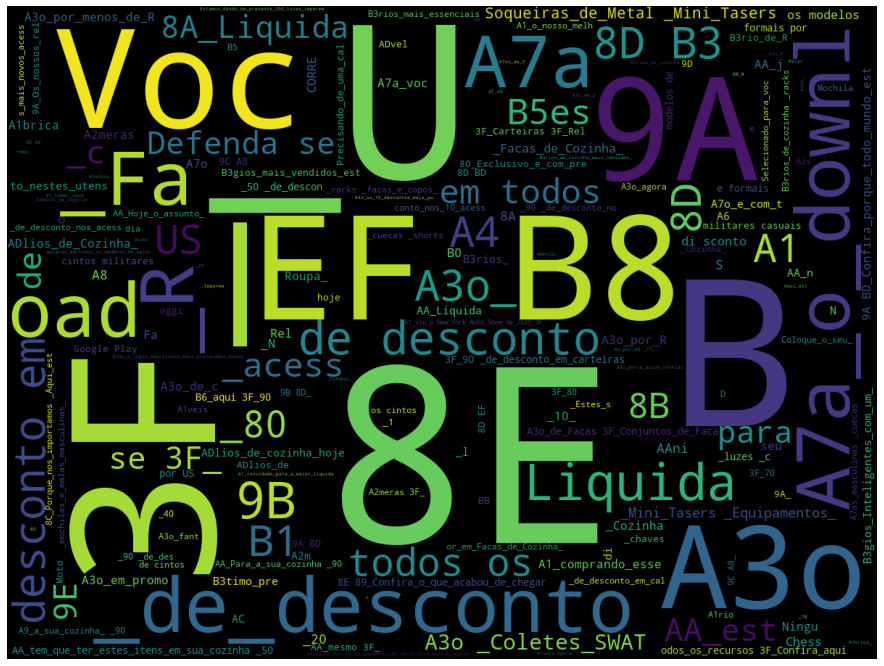

In [85]:
text=  " ".join(s for s in email.subject)
wordcloud = WordCloud(width=1200, height=900, background_color="black", stopwords = stopwords).generate(text)
fig, ax = plt.subplots(figsize=(25,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

### Nuvem de palavras com os assuntos principais dos Emails

## **Por que os mês de abril recebeu menos emails que novembro no ano de 2020?**

#### Verificando a quantidade de emails recebidos em abril de 2020

In [53]:
abril2020["year"].value_counts()

2020    25
Name: year, dtype: int64

#### Verificando a quantidade de emails recebidos em novembro de 2020

In [54]:
november2020["year"].value_counts()

2020    39
Name: year, dtype: int64

In [55]:
valores = [25, 39]

In [56]:
MESES = ["Abril", "Novembro"]

### 📊 Plotando o gráfico para fazer as comparações

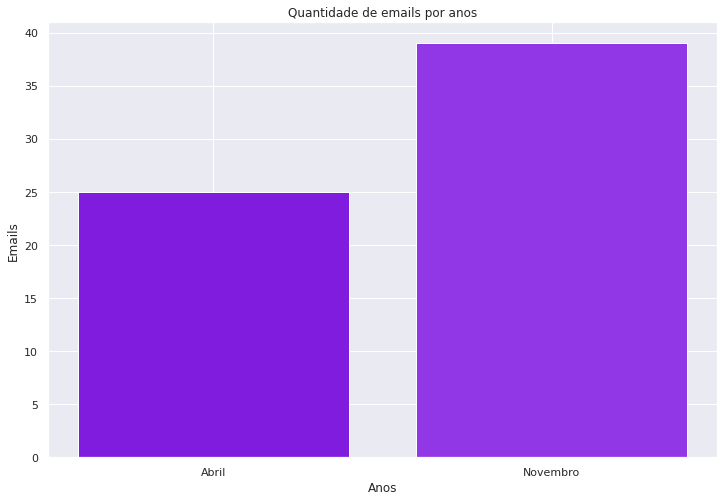

In [57]:
plt.bar(MESES, valores, color=["#801cdd", "#9237e6"])
plt.ylabel("Emails")
plt.xlabel("Anos")
plt.title("Quantidade de emails por anos")
plt.show()

### Igual visto anteriormente, Novembro se caracteriza por ser o início de vendas de produtos do final de ano. Liquidações, promoções em todas as lojas, há também a black friday, onde vários brasileiros compram produtos diversos. Isso justifica o pico de Emails promocionais em novembro.

## **Qual o horário de pico de recebimentos de email?**

#### Pegando a coluna "timeofday" para filtrar as horas de email

In [58]:
email["timeofday"]
horas = email['timeofday'].astype(int)
Horas = horas.value_counts()
listvalues = Horas.values

In [59]:
listhoras = Horas.index

### 📊 Plotando o gráfico

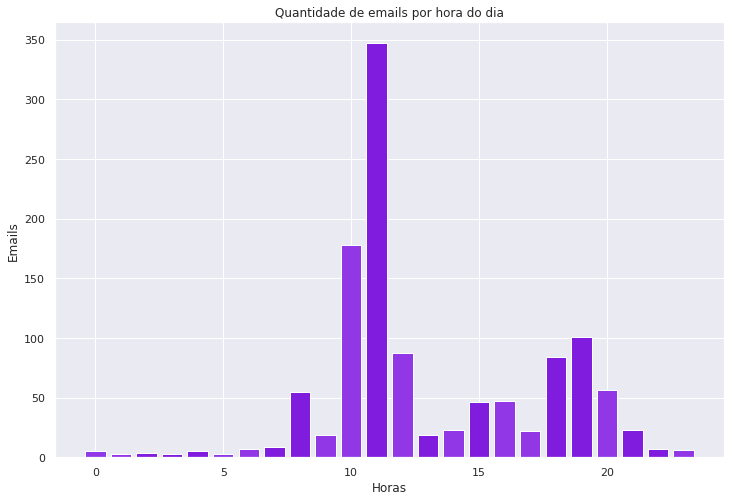

In [60]:
plt.bar(listhoras, listvalues, color=["#801cdd", "#9237e6"])
plt.ylabel("Emails")
plt.xlabel("Horas")
plt.title("Quantidade de emails por hora do dia")
plt.show()

### Dessa forma, 11 horas foi o horário pico de emails, chegando a receber quase 350 emails. 10 horas recebeu 160 emails, ficando em segundo lugar, depois das 11 horas os emails ficaram entre 20 e 100.

## Enfim, finalizamos nossa análise dos Emails promocionais. Achei muito interessante analisar meu inbox promocional e perceber o tanto de promoção que perdi haha. Estatística descritiva é uma área muito interessante e pretendo fazer mais projetos como esse.